<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-05-17 13:46:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  43.7MB/s    in 3.5s    

2025-05-17 13:46:23 (43.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


/tmp/ipykernel_1485/1900855748.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeNum'] = df_clean['Age'].map(age_map)
/tmp/ipykernel_1485/1900855748.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['SOPartFreqNum'] = df_clean['SOPartFreq'].map(participation_map)


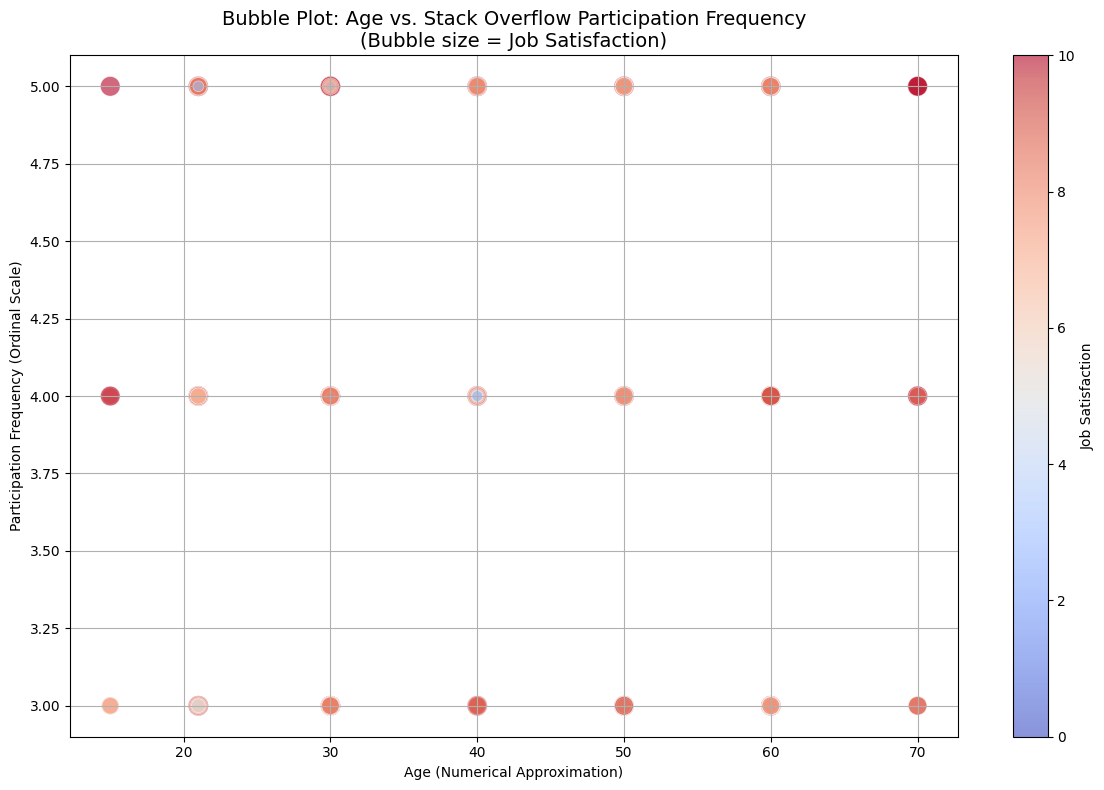

In [4]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing relevant values
df_clean = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Map Age categories to approximate numerical values
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df_clean['AgeNum'] = df_clean['Age'].map(age_map)

# Map SOPartFreq to ordinal scale
participation_map = {
    'Multiple times per day': 5,
    'Daily or almost daily': 4,
    'A few times per week': 3,
    'A few times per month': 2,
    'Less than once per month': 1,
    'I have not participated': 0
}
df_clean['SOPartFreqNum'] = df_clean['SOPartFreq'].map(participation_map)

# Drop rows where mapping failed
df_clean = df_clean.dropna(subset=['AgeNum', 'SOPartFreqNum', 'JobSat'])

# Bubble Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_clean['AgeNum'],
    df_clean['SOPartFreqNum'],
    s=df_clean['JobSat'] * 20,  # Scale the bubble size
    alpha=0.6,
    c=df_clean['JobSat'],
    cmap='coolwarm',
    edgecolors='w',
    linewidth=0.5
)

plt.title('Bubble Plot: Age vs. Stack Overflow Participation Frequency\n(Bubble size = Job Satisfaction)', fontsize=14)
plt.xlabel('Age (Numerical Approximation)')
plt.ylabel('Participation Frequency (Ordinal Scale)')
plt.colorbar(label='Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


/tmp/ipykernel_1485/1100598959.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeNum'] = df_clean['Age'].map(age_map)


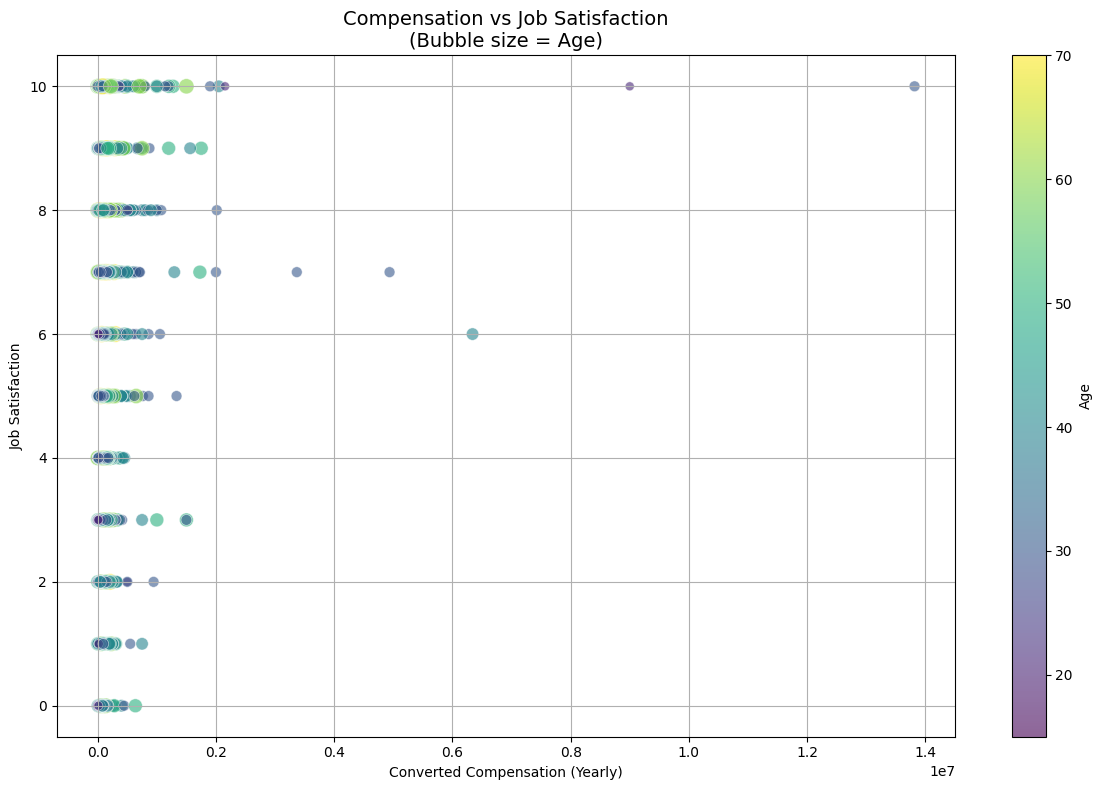

In [5]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt



# Drop rows with missing values in the required columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Map Age categories to approximate numeric values
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df_clean['AgeNum'] = df_clean['Age'].map(age_map)

# Remove rows with failed age mapping
df_clean = df_clean.dropna(subset=['AgeNum'])

# Bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(
    df_clean['ConvertedCompYearly'],
    df_clean['JobSat'],
    s=df_clean['AgeNum'] * 2,  # scale bubble size
    alpha=0.6,
    c=df_clean['AgeNum'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.title('Compensation vs Job Satisfaction\n(Bubble size = Age)', fontsize=14)
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Job Satisfaction')
plt.colorbar(label='Age')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_1485/91944977.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')


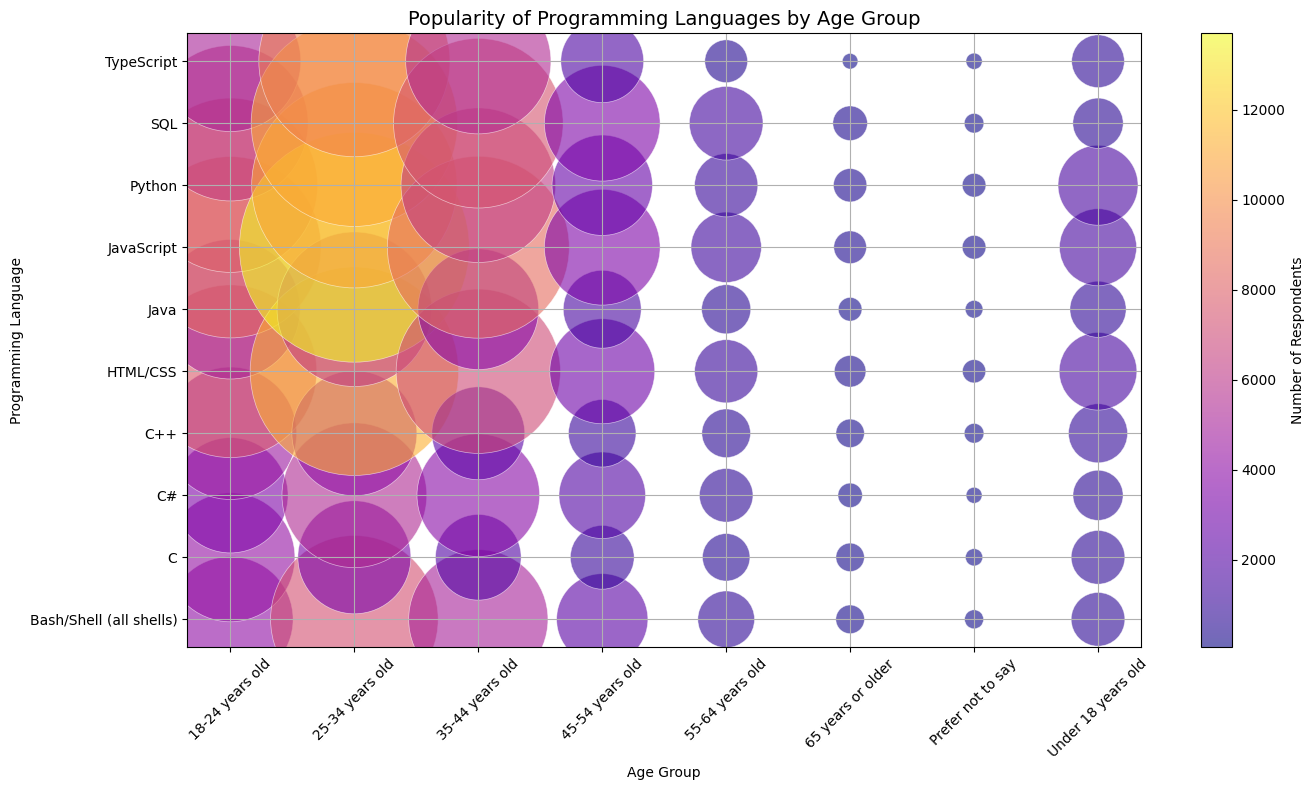

In [6]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is already loaded and contains 'Age' and 'LanguageHaveWorkedWith'

# Drop rows with missing Age or LanguageHaveWorkedWith
df_clean = df.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# Explode the LanguageHaveWorkedWith column to get one language per row
df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_clean.explode('LanguageHaveWorkedWith')

# Group by Age and Language, then count occurrences
lang_counts = df_exploded.groupby(['Age', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Filter top 10 most frequent language entries for better visibility (optional)
top_languages = lang_counts.groupby('LanguageHaveWorkedWith')['Count'].sum().nlargest(10).index
lang_counts = lang_counts[lang_counts['LanguageHaveWorkedWith'].isin(top_languages)]

# Bubble plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=lang_counts['Age'],
    y=lang_counts['LanguageHaveWorkedWith'],
    s=lang_counts['Count'] * 2,  # scale bubble size
    alpha=0.6,
    c=lang_counts['Count'],
    cmap='plasma',
    edgecolors='w',
    linewidth=0.5
)

plt.title('Popularity of Programming Languages by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.xticks(rotation=45)
plt.colorbar(scatter, label='Number of Respondents')
plt.tight_layout()
plt.grid(True)
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


/tmp/ipykernel_1485/1151667922.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DatabaseWantToWorkWith'] = df_clean['DatabaseWantToWorkWith'].str.split(';')


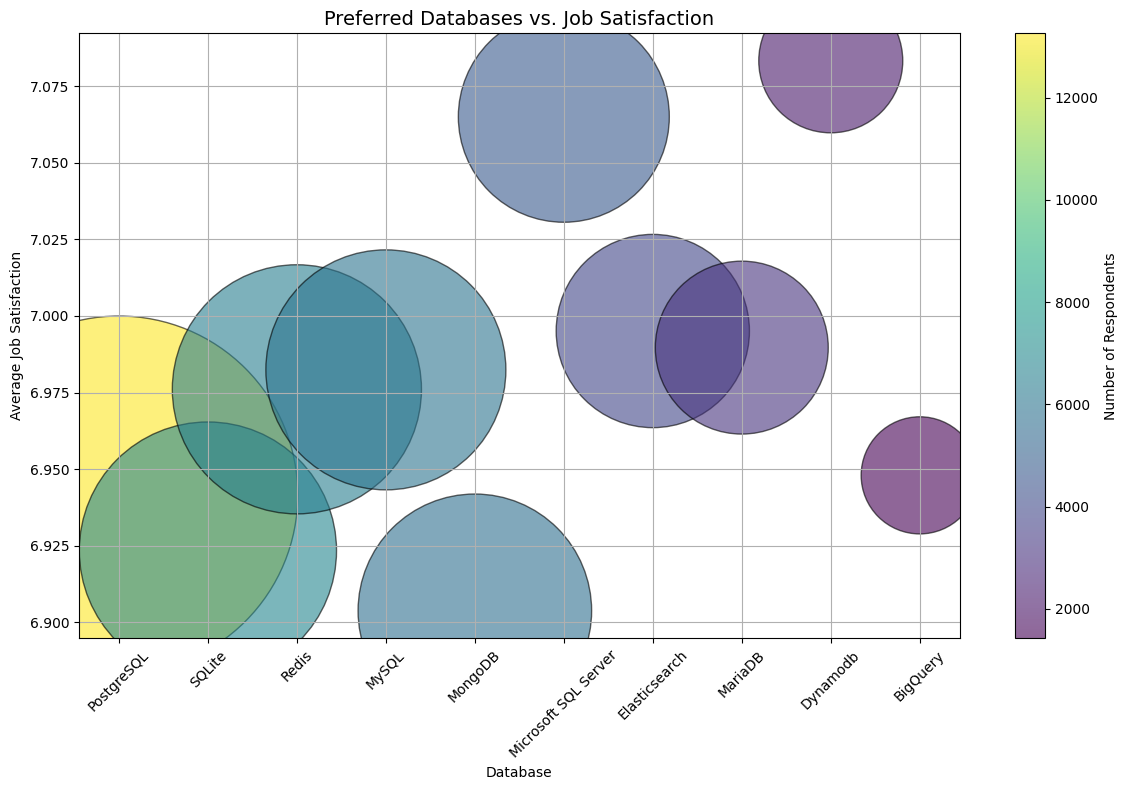

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Clean the dataset: drop missing values
df_clean = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Split multiple databases into separate rows
df_clean['DatabaseWantToWorkWith'] = df_clean['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_clean.explode('DatabaseWantToWorkWith')

# Group by database and calculate average job satisfaction and count of respondents
db_stats = df_exploded.groupby('DatabaseWantToWorkWith').agg({
    'JobSat': 'mean',
    'DatabaseWantToWorkWith': 'count'
}).rename(columns={'DatabaseWantToWorkWith': 'RespondentCount'}).reset_index()

# Optional: Filter to top 10 most mentioned databases
top_dbs = db_stats.sort_values('RespondentCount', ascending=False).head(10)

# Create bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    top_dbs['DatabaseWantToWorkWith'],
    top_dbs['JobSat'],
    s=top_dbs['RespondentCount'] * 5,  # scale bubble size
    alpha=0.6,
    c=top_dbs['RespondentCount'],
    cmap='viridis',
    edgecolors='black'
)

plt.title('Preferred Databases vs. Job Satisfaction', fontsize=14)
plt.xlabel('Database')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
plt.colorbar(scatter, label='Number of Respondents')
plt.tight_layout()
plt.grid(True)
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


/tmp/ipykernel_1485/640685259.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DevType'] = df_clean['DevType'].str.split(';')


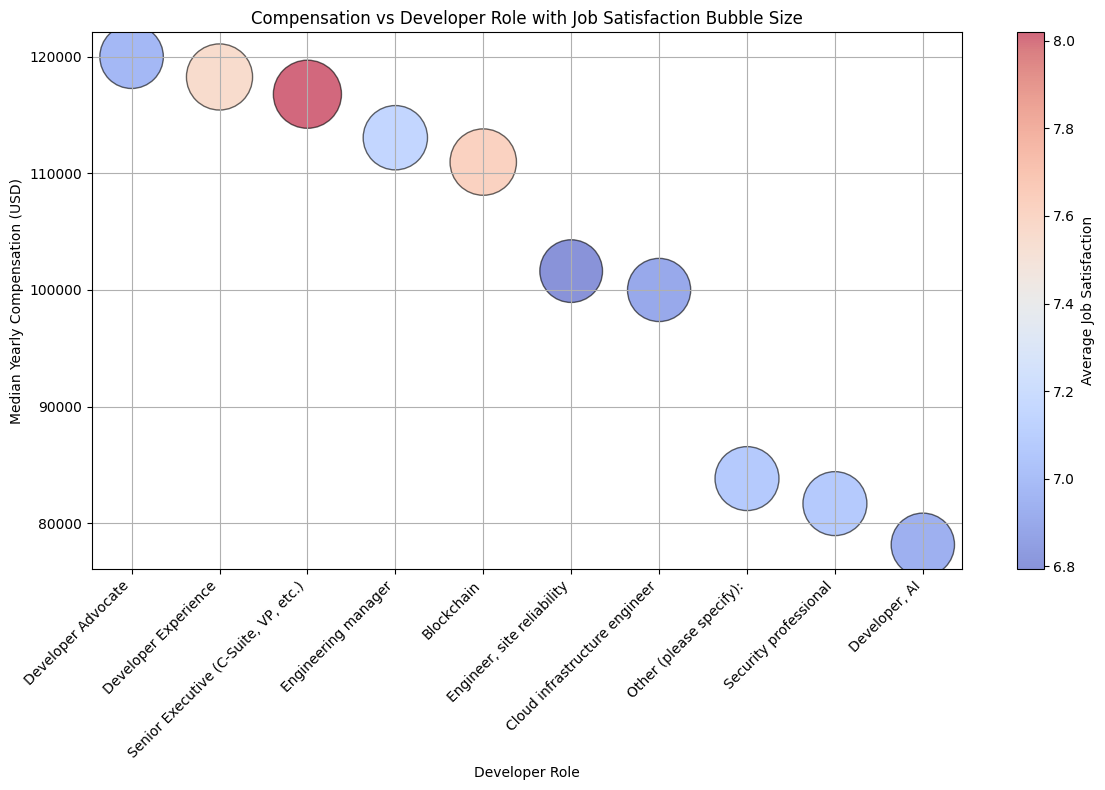

In [8]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Clean data: Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'DevType', 'JobSat'])

# Explode DevType because it may have multiple roles separated by semicolon
df_clean['DevType'] = df_clean['DevType'].str.split(';')
df_exploded = df_clean.explode('DevType')

# Group by DevType to get median compensation and average job satisfaction
grouped = df_exploded.groupby('DevType').agg({
    'ConvertedCompYearly': 'median',
    'JobSat': 'mean'
}).reset_index()

# Filter to top 10 developer roles by median compensation for clearer visualization
top_devtypes = grouped.sort_values('ConvertedCompYearly', ascending=False).head(10)

# Plot bubble chart
plt.figure(figsize=(12,8))
scatter = plt.scatter(
    top_devtypes['DevType'],
    top_devtypes['ConvertedCompYearly'],
    s=top_devtypes['JobSat'] * 300,  # scale bubble size by job satisfaction (adjust multiplier as needed)
    alpha=0.6,
    c=top_devtypes['JobSat'],  # color by job satisfaction too
    cmap='coolwarm',
    edgecolors='black'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Developer Role')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Compensation vs Developer Role with Job Satisfaction Bubble Size')
cbar = plt.colorbar(scatter)
cbar.set_label('Average Job Satisfaction')

plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipykernel_1485/1810110129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ToolsList'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')


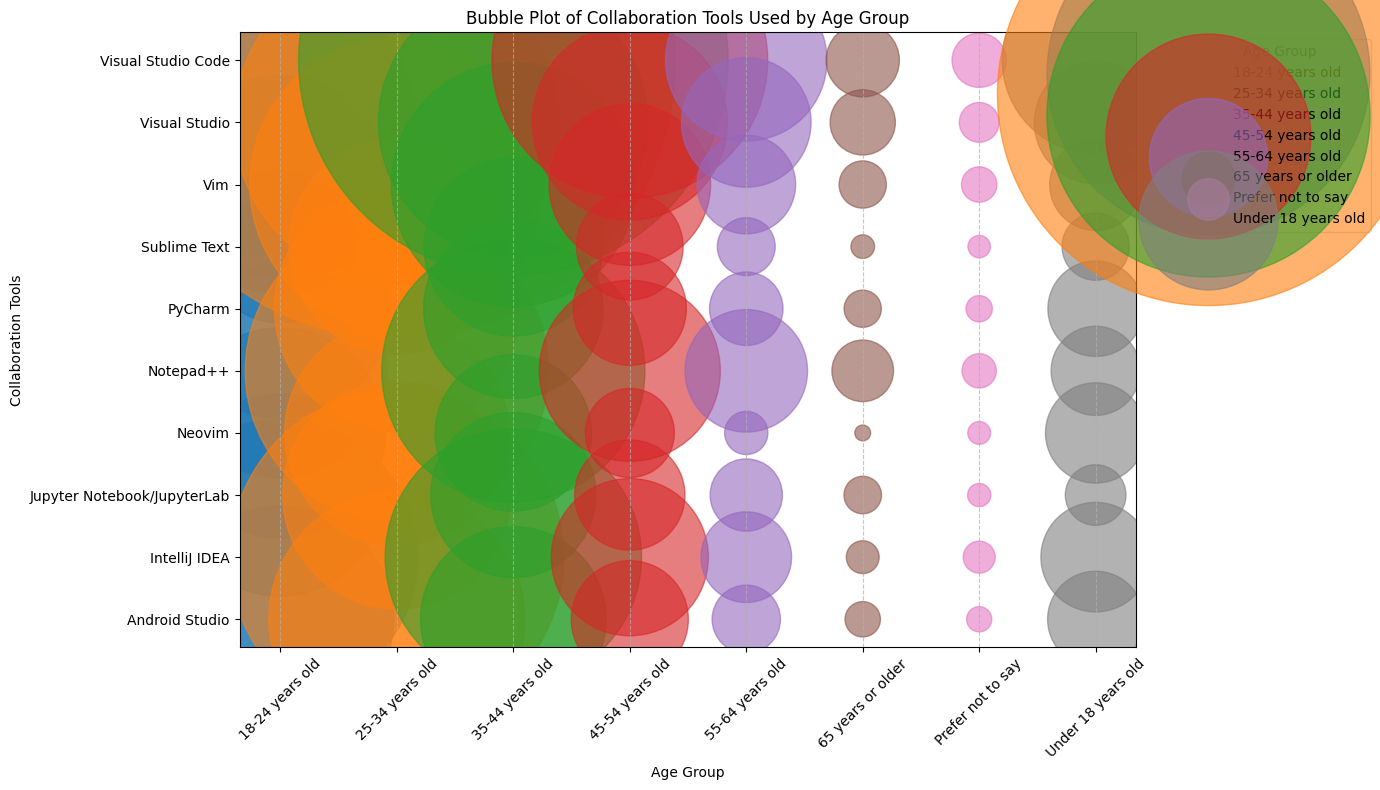

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Clean data: drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Explode collaboration tools (split by semicolon)
df_clean['ToolsList'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_exploded = df_clean.explode('ToolsList')

# Strip whitespace in tool names
df_exploded['ToolsList'] = df_exploded['ToolsList'].str.strip()

# Group by Age and Tool, count frequency
grouped = df_exploded.groupby(['Age', 'ToolsList']).size().reset_index(name='Frequency')

# For clearer plotting, filter top 10 tools overall
top_tools = grouped.groupby('ToolsList')['Frequency'].sum().sort_values(ascending=False).head(10).index
grouped_top = grouped[grouped['ToolsList'].isin(top_tools)]

# Pivot for plotting ease (optional)
pivot_df = grouped_top.pivot(index='ToolsList', columns='Age', values='Frequency').fillna(0)

# Plot bubble chart
plt.figure(figsize=(14,8))

# We plot with y=ToolsList, x=Age, and size=Frequency
for age in pivot_df.columns:
    plt.scatter(
        x=[age]*len(pivot_df),
        y=pivot_df.index,
        s=pivot_df[age]*10,  # scale bubble size, adjust multiplier as needed
        alpha=0.6,
        label=age
    )

plt.xlabel('Age Group')
plt.ylabel('Collaboration Tools')
plt.title('Bubble Plot of Collaboration Tools Used by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



/tmp/ipykernel_1485/3395779586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WebframesList'] = df_clean['WebframeWantToWorkWith'].str.split(';')


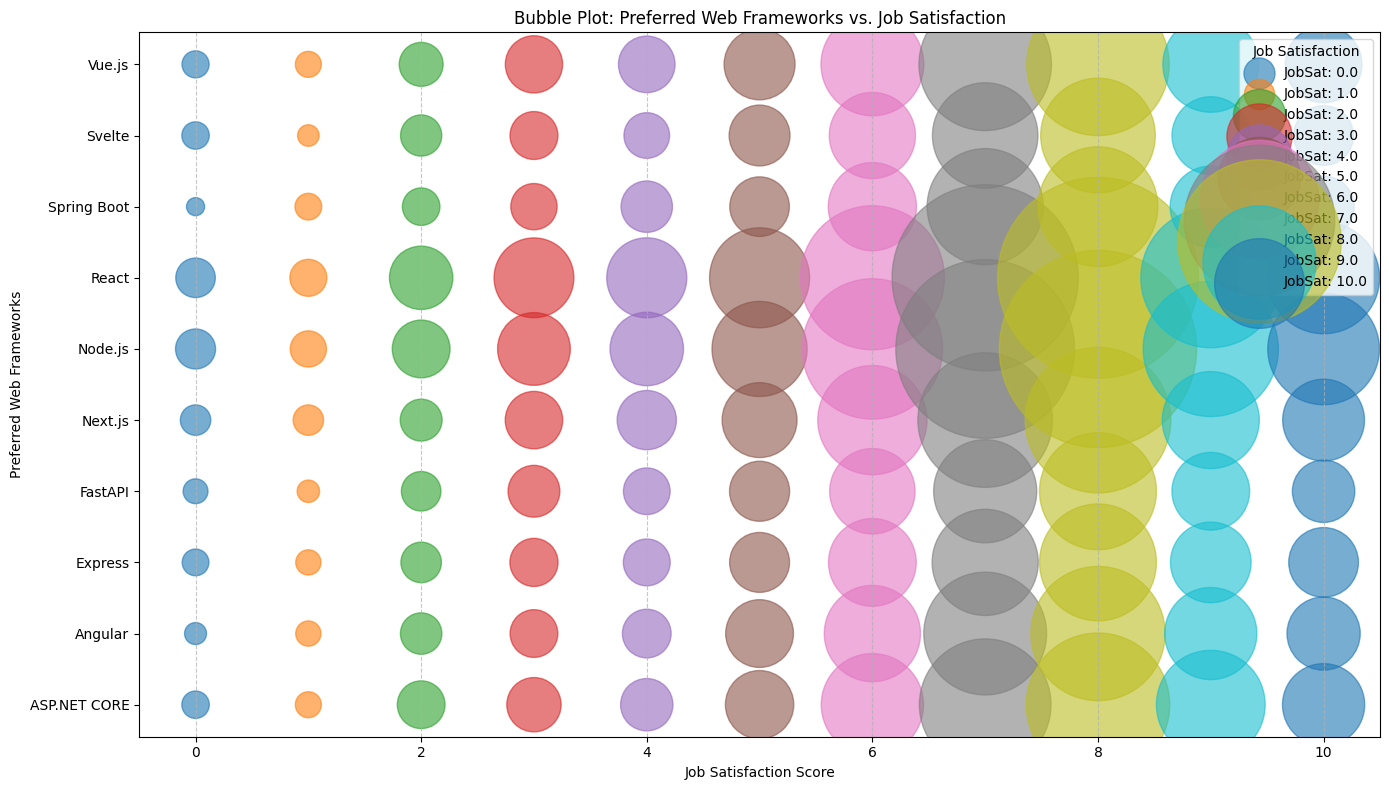

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Explode the WebframeWantToWorkWith column (split by semicolon)
df_clean['WebframesList'] = df_clean['WebframeWantToWorkWith'].str.split(';')
df_exploded = df_clean.explode('WebframesList')

# Strip whitespace
df_exploded['WebframesList'] = df_exploded['WebframesList'].str.strip()

# Group by Web framework and JobSat, count respondents
grouped = df_exploded.groupby(['WebframesList', 'JobSat']).size().reset_index(name='Respondents')

# Filter out frameworks with very few respondents to reduce clutter
top_frameworks = grouped.groupby('WebframesList')['Respondents'].sum().sort_values(ascending=False).head(10).index
grouped_top = grouped[grouped['WebframesList'].isin(top_frameworks)]

# Plot bubble chart
plt.figure(figsize=(14,8))

for job_sat in grouped_top['JobSat'].unique():
    subset = grouped_top[grouped_top['JobSat'] == job_sat]
    plt.scatter(
        x=subset['JobSat'],
        y=subset['WebframesList'],
        s=subset['Respondents'] * 10,  # scale bubble size (adjust multiplier as needed)
        alpha=0.6,
        label=f'JobSat: {job_sat:.1f}'
    )

plt.xlabel('Job Satisfaction Score')
plt.ylabel('Preferred Web Frameworks')
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')
plt.legend(title='Job Satisfaction')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



/tmp/ipykernel_1485/20881930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AdmiredList'] = df_clean['LanguageAdmired'].str.split(';')


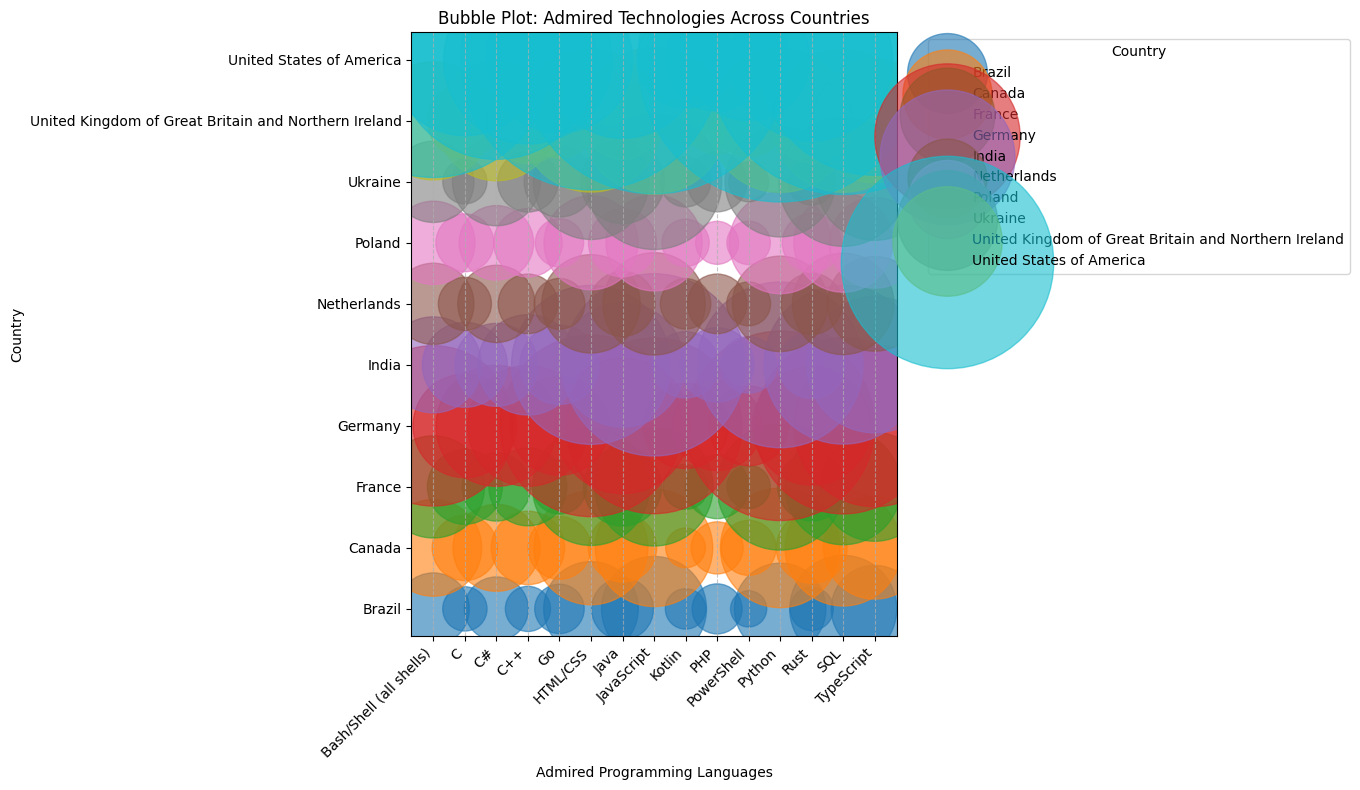

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['LanguageAdmired', 'Country'])

# Explode the LanguageAdmired column (split by semicolon)
df_clean['AdmiredList'] = df_clean['LanguageAdmired'].str.split(';')
df_exploded = df_clean.explode('AdmiredList')

# Strip whitespace
df_exploded['AdmiredList'] = df_exploded['AdmiredList'].str.strip()

# Group by Country and Admired Language, count respondents
grouped = df_exploded.groupby(['Country', 'AdmiredList']).size().reset_index(name='Count')

# To keep plot readable, filter to top 10 countries by total responses
top_countries = grouped.groupby('Country')['Count'].sum().sort_values(ascending=False).head(10).index
grouped_top = grouped[grouped['Country'].isin(top_countries)]

# Also filter to top 15 most admired languages across these countries
top_languages = grouped_top.groupby('AdmiredList')['Count'].sum().sort_values(ascending=False).head(15).index
grouped_top = grouped_top[grouped_top['AdmiredList'].isin(top_languages)]

# Create plot
plt.figure(figsize=(14,8))

for country in grouped_top['Country'].unique():
    subset = grouped_top[grouped_top['Country'] == country]
    plt.scatter(
        x=subset['AdmiredList'],
        y=[country]*len(subset),
        s=subset['Count']*10,  # scale bubble size (adjust multiplier if needed)
        alpha=0.6,
        label=country
    )

plt.xlabel('Admired Programming Languages')
plt.ylabel('Country')
plt.title('Bubble Plot: Admired Technologies Across Countries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
